### evaluation Project - 5

**evaluation Project - 5
Census Income Project
Problem Statement:**


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**1) Categorical features(9) :**['Workclass','Education',  'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country','Income']
**2) Continuous features(6) :**['Age',  'Fnlwgt','Capital_gain', 'Capital_loss']
**3) There are no null values present in dataset**

In [6]:

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### There are no null values present in dataset .

In [7]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

#### We found 1836 '?' marks in Workclass which are as good as Null values present in Workclass .

In [8]:

df.loc[df['Workclass']==' ?'].head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


#### from above information we can see ['Workclass','Occupation','Native_country'] have '?' in these features which is like null values will have to deal with it.

In [9]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [10]:

df.loc[df['Occupation']==' ?'].head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


In [11]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [12]:
df.loc[df['Native_country']==' ?'].head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


#### filling randomly '?' Null values.

In [13]:
cols=['Workclass','Occupation','Native_country'] 
for i in cols:
    df.drop(df[df[i] == ' ?'].index,inplace=True)

In [14]:
cols=['Workclass','Occupation','Native_country'] 
for i in cols:
    print(f"NO of '?'in{i}",len(df.loc[df[i]=='?']))
    print(f'{i} unique values',df['Occupation'].unique())

NO of '?'inWorkclass 0
Workclass unique values [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
NO of '?'inOccupation 0
Occupation unique values [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
NO of '?'inNative_country 0
Native_country unique values [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


#### from this we can see there are no values left with '?' in dataset

Text(0.5, 1.0, 'Workclass vs Income')

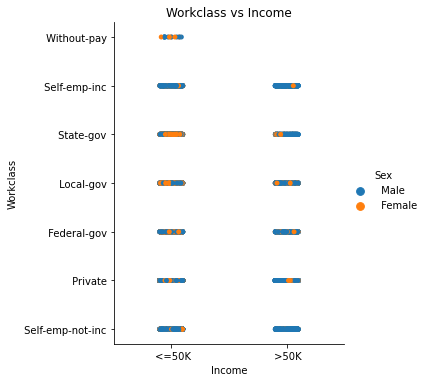

In [15]:
#Lets check the Workclass vs Income 
sns.catplot(y='Workclass',x='Income',data=df,hue='Sex')
plt.title("Workclass vs Income")

#### We can see there very few Females have income>50K compaired to Mails.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

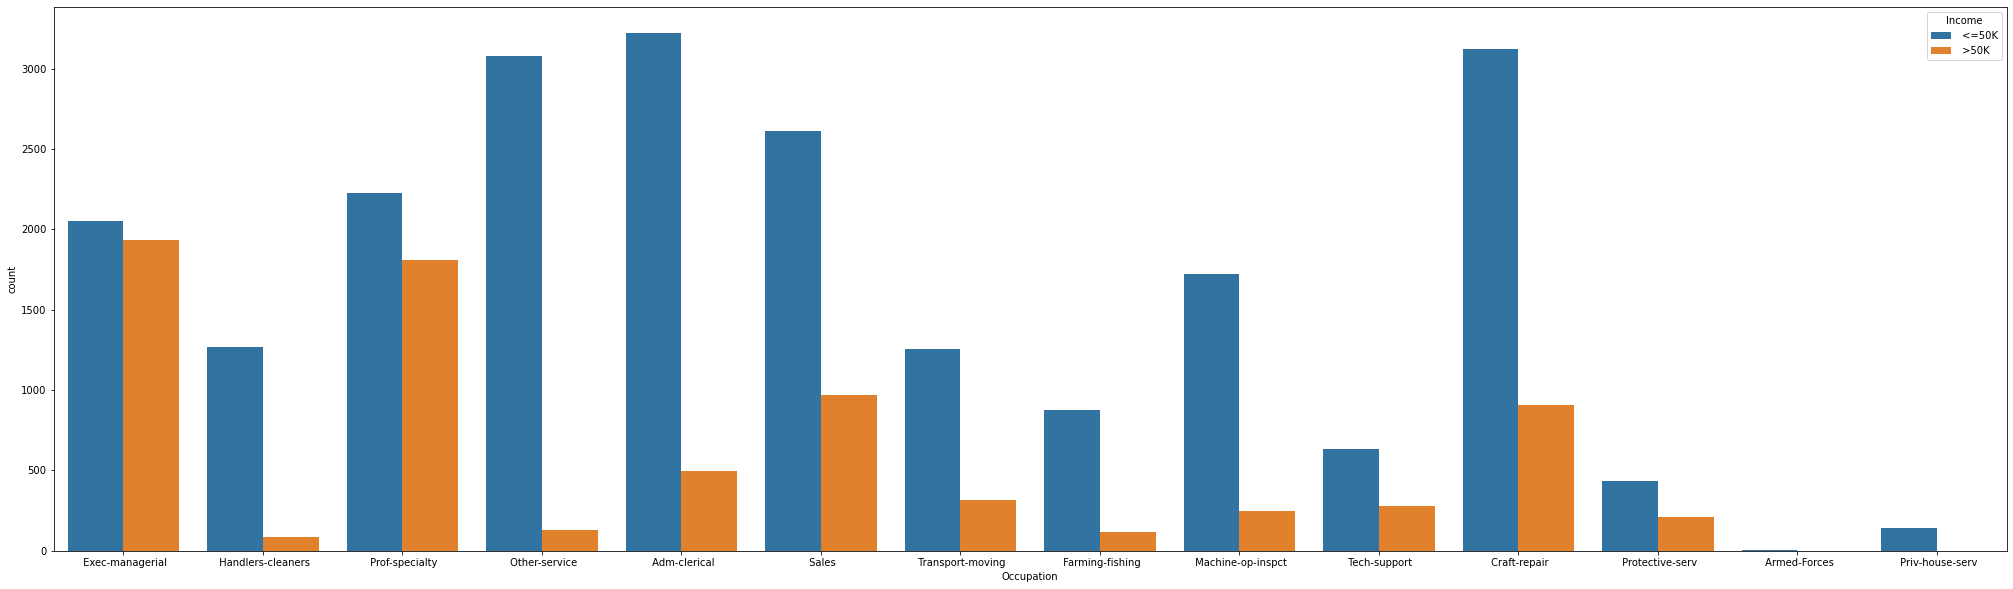

In [16]:
#Lets check the Workclass vs Income 
plt.figure(figsize=(35,10))
sns.countplot(x='Occupation',data=df,hue='Income')


####  Exec-managerial and  ' Prof-specialty' has highest salaries almost(40-45%) of professionals has salry >50K ."Occupations" decides "Income" .

Text(0.5, 1.0, 'Occupation vs Income')

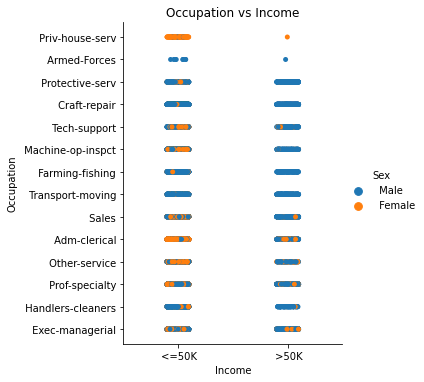

In [17]:
#Lets check the Occupation vs Income 
sns.catplot(y='Occupation',x='Income',data=df,hue='Sex')
plt.title("Occupation vs Income")

#### Very few ' Armed-Forces' ,' Priv-house-serv' has "Income" >50k .

Text(0.5, 1.0, 'Education ')

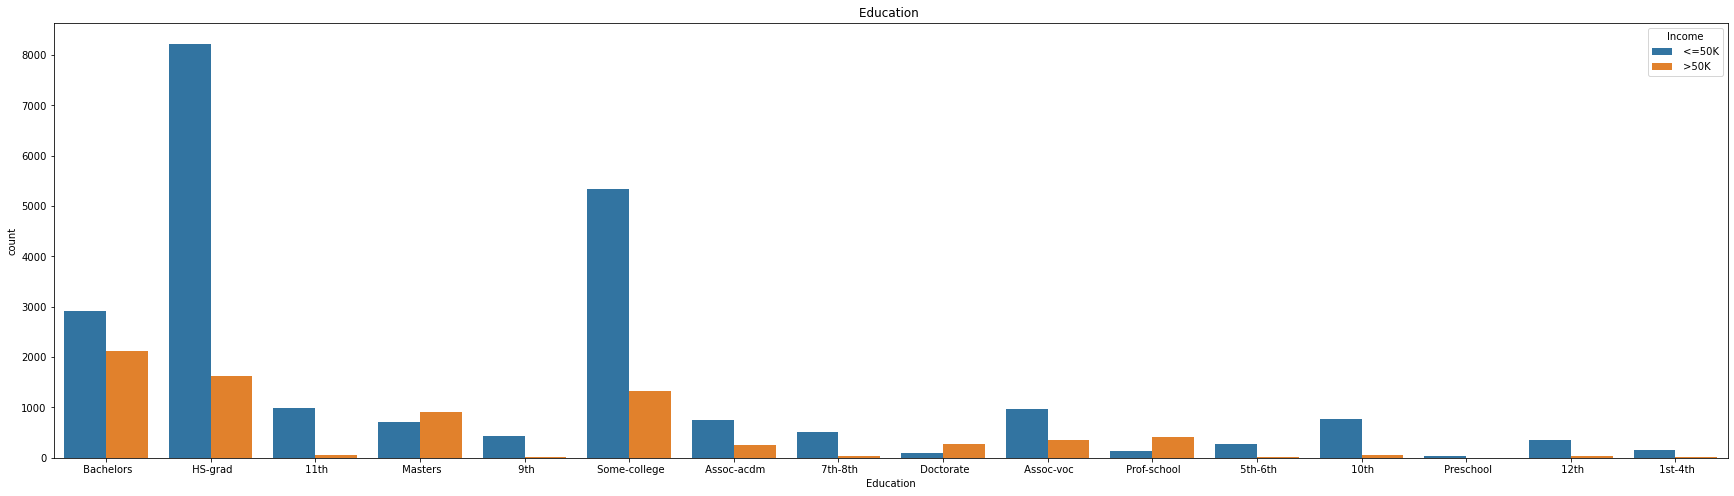

In [18]:
#Lets check the Occupation
plt.figure(figsize=(30,8))
sns.countplot(x='Education',data=df,hue='Income')

plt.title("Education ")

#### Almost 70% of ' Prof-school' candidates has heighest Income >50K .Then ' Doctorate' ,' Bachelors' comes .Education Decides the Income . 
#### No ' Preschool'  and ' 1st-4th' candidate has Income >50K

Text(0.5, 1.0, 'Native_country')

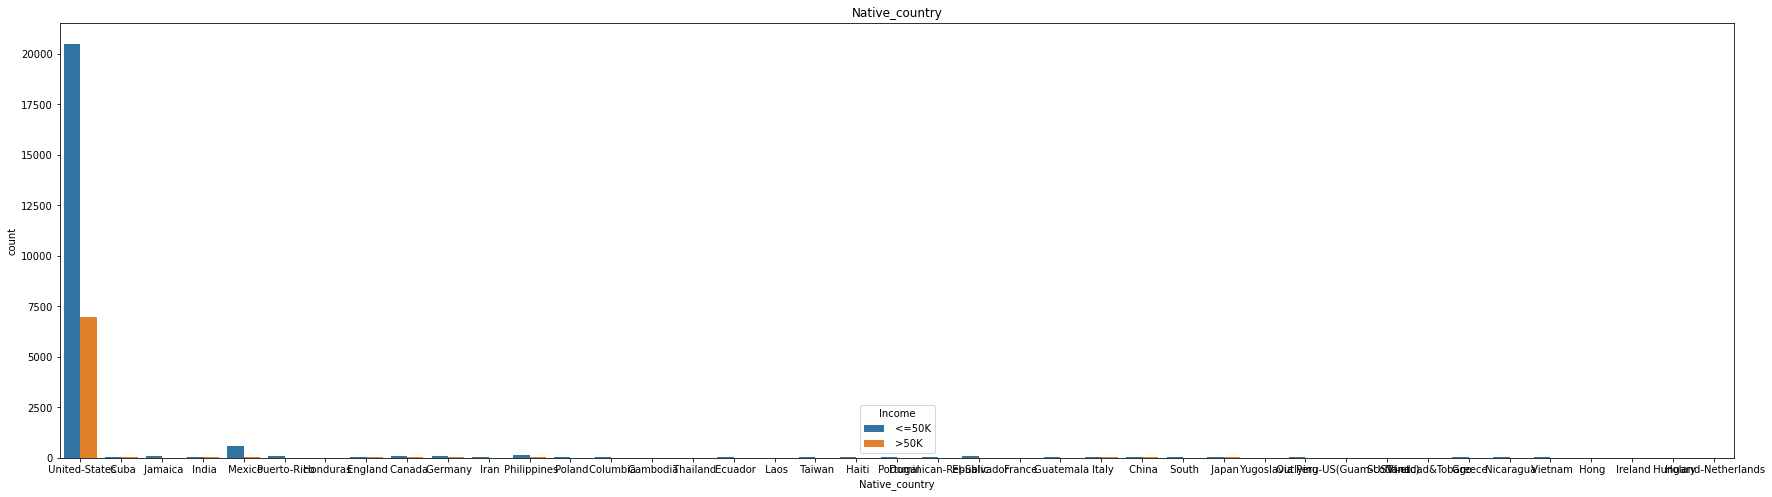

In [19]:
#Lets check the Native_country 
plt.figure(figsize=(30,8))
sns.countplot(x='Native_country',data=df,hue='Income')

plt.title("Native_country")

In [20]:
df['Native_country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Iran                             42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

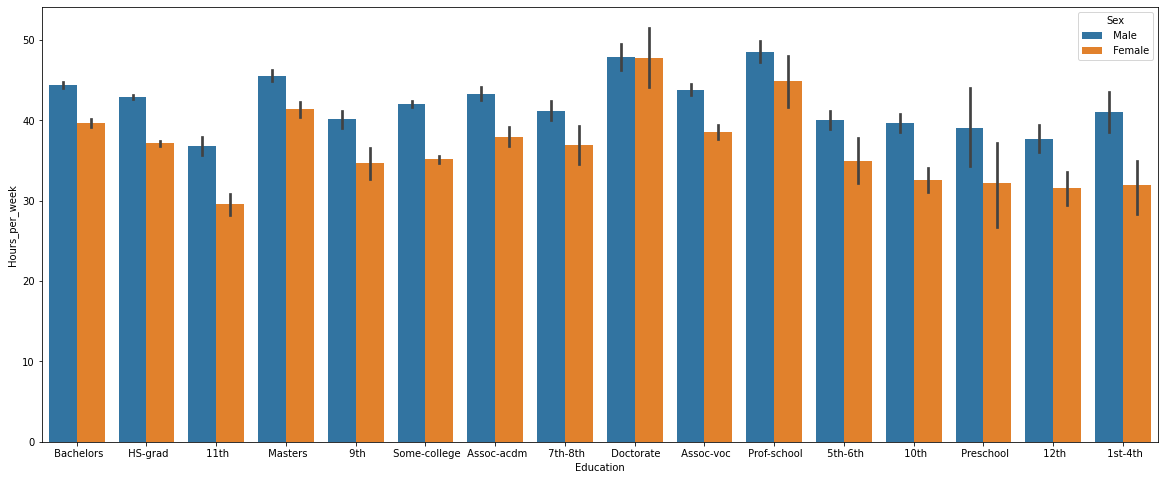

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(x='Education',y='Hours_per_week',data=df,hue='Sex')
##Checking the distribution of Education and  Hours_per_week as Sex ###

#### Females works for less Hours_per_week than Males

Text(0.5, 1.0, 'Occupation vs Income')

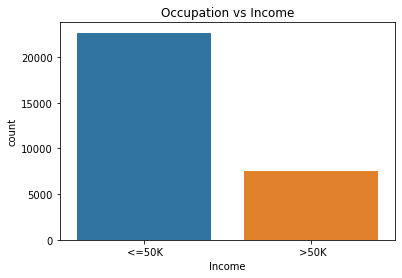

In [22]:
#Lets check the Occupation vs Income 
sns.countplot(x='Income' ,data =df)
plt.title("Occupation vs Income")

In [23]:
df['Income'].value_counts()

 <=50K    22653
 >50K      7508
Name: Income, dtype: int64

#### Distribution of data is imbalanced 75% , 25% ,so will not only consider accuracy but also have to consider F1 score too.

### Categorical data conversion using LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder
cols=['Workclass','Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 
       'Race', 'Sex', 'Hours_per_week', 'Native_country','Income']
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
for i in cols :
    df[i] = le.fit_transform(df[i])
 
# printing label
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,12,2,3,0,4,1,0,0,12,38,0
1,38,2,215646,11,8,0,5,1,4,1,0,0,39,38,0
2,53,2,234721,1,6,2,5,0,2,1,0,0,39,38,0
3,28,2,338409,9,12,2,9,5,2,0,0,0,39,4,0
4,37,2,284582,12,13,2,3,5,4,0,0,0,39,38,0


#### We can see all categorical data got converted into integer data but scale of it is not same , so need to transform into same scale using standard scaler

### Correlation

In [27]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080548,-0.076511,-0.001111,0.043525,-0.276378,-0.005680,-0.246456,0.023373,0.081992,0.080154,0.060166,0.102451,-0.001905,0.242000
Workclass,0.080548,1.000000,-0.032395,0.017892,0.037729,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.035340,0.007226,0.049054,0.007644,0.018103
Fnlwgt,-0.076511,-0.032395,1.000000,-0.027115,-0.044954,0.032197,0.000152,0.009289,-0.023882,0.025387,0.000427,-0.009757,-0.022581,-0.066709,-0.008978
Education,-0.001111,0.017892,-0.027115,1.000000,0.345431,-0.040654,-0.038231,-0.012720,0.011158,-0.027880,0.030577,0.015025,0.060629,0.078794,0.078981
Education_num,0.043525,0.037729,-0.044954,0.345431,1.000000,-0.063457,0.087778,-0.091928,0.032791,0.006131,0.124413,0.079656,0.154690,0.091547,0.335317
Marital_status,-0.276378,-0.034338,0.032197,-0.040654,-0.063457,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.042424,-0.035197,-0.191256,-0.025911,-0.193504
Occupation,-0.005680,0.015719,0.000152,-0.038231,0.087778,0.022702,1.000000,-0.053742,0.000736,0.062350,0.022170,0.014597,0.017495,-0.003470,0.051551
Relationship,-0.246456,-0.067401,0.009289,-0.012720,-0.091928,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.058258,-0.063569,-0.260494,-0.010806,-0.251009
Race,0.023373,0.044700,-0.023882,0.011158,0.032791,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.014351,0.023520,0.049021,0.124511,0.071666
Sex,0.081992,0.074917,0.025387,-0.027880,0.006131,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.048811,0.047017,0.233435,0.000612,0.216715


<AxesSubplot:>

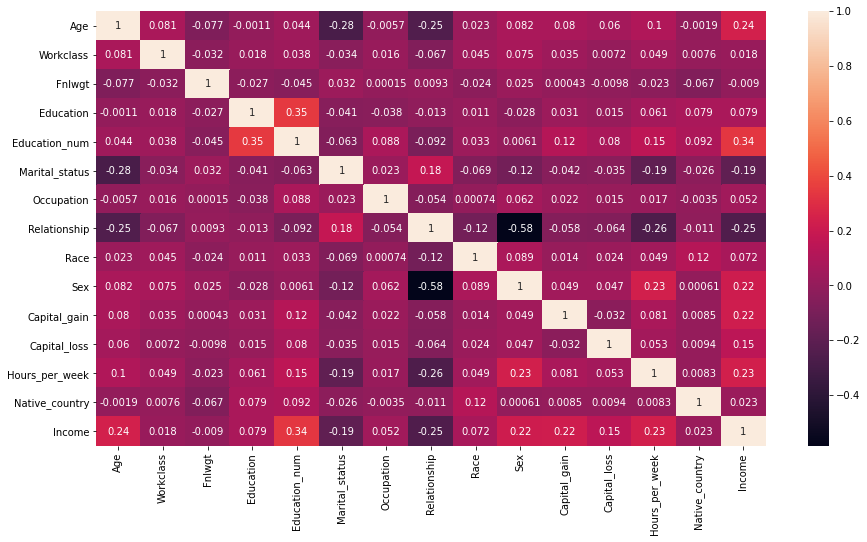

In [28]:
#correlation matrix
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),annot=True)

In [29]:
## correlation with target
corr=round(df.corr()['Income'].sort_values(ascending=False),2)
corr

Income            1.00
Education_num     0.34
Age               0.24
Hours_per_week    0.23
Capital_gain      0.22
Sex               0.22
Capital_loss      0.15
Education         0.08
Race              0.07
Occupation        0.05
Native_country    0.02
Workclass         0.02
Fnlwgt           -0.01
Marital_status   -0.19
Relationship     -0.25
Name: Income, dtype: float64

**+vely correlated features :**  ['Education_num','Age','Hours_per_week','Capital_gain','Sex','Capital_loss',
                                'Education','Race', 'Occupation', 'Native_country', 'Workclass']
    
**+vely correlated features :**  ['Fnlwgt','Marital_status','Relationship',]

Text(0.5, 1.0, 'Correlation with target')

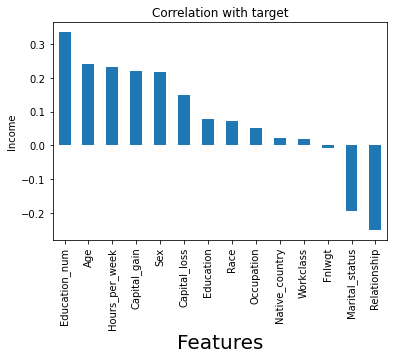

In [30]:
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Income')
plt.title('Correlation with target')

### Data splitting for Training model

In [42]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [43]:
print("x shape :",x.shape,"yshape :",y.shape)

x shape : (30161, 14) yshape : (30161,)


### Checking Skewness

In [44]:
x.skew()

Age                0.530223
Workclass          1.154786
Fnlwgt             1.459212
Education         -0.944971
Education_num     -0.305328
Marital_status    -0.009387
Occupation         0.110420
Relationship       0.820275
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.165144
Native_country    -4.178826
dtype: float64

### skewness removal using power transform:

In [47]:
#### skewness removal using power transform:
from sklearn.preprocessing import PowerTransformer
# power transform the raw data

power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)
print(data_trans ,'\n',type(data_trans))

# putting 'numpy.ndarray' data into dataframe
x=pd.DataFrame(data_trans ,columns=x.columns)
print(x)

[[ 0.92168672  1.76422881 -1.08947753 ... -0.22285067 -2.34876409
   0.29780123]
 [ 0.10118222 -0.13178115  0.39891017 ... -0.22285067 -0.07775358
   0.29780123]
 [ 1.10205308 -0.13178115  0.56256174 ... -0.22285067 -0.07775358
   0.29780123]
 ...
 [ 1.38543653 -0.13178115 -0.21923333 ... -0.22285067 -0.07775358
   0.29780123]
 [-1.39525882 -0.13178115  0.2719342  ... -0.22285067 -1.76597858
   0.29780123]
 [ 1.04285056  0.885767    0.98172114 ... -0.22285067 -0.07775358
   0.29780123]] 
 <class 'numpy.ndarray'>
            Age  Workclass    Fnlwgt  Education  Education_num  \
0      0.921687   1.764229 -1.089478  -0.492303       1.157829   
1      0.101182  -0.131781  0.398910   0.082837      -0.482400   
2      1.102053  -0.131781  0.562562  -2.092199      -1.226159   
3     -0.757066  -0.131781  1.339460  -0.492303       1.157829   
4      0.023961  -0.131781  0.956769   0.392095       1.595157   
...         ...        ...       ...        ...            ...   
30156 -0.855518  -0.

In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings 
warnings.filterwarnings('ignore')
lr=LogisticRegression()

**will try to find out best value Random State** 

In [56]:
max_accu = 0
max_randst = 0
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    
    pred_lr=lr.predict(x_test)
    accu_score= accuracy_score(y_test,pred_lr)
    if max_accu<accu_score:
        max_accu= accu_score
        max_randst= i
print("max accuracy score is :", round(max_accu*100 ,1),"at random state :",max_randst)

max accuracy score is : 83.6 at random state : 481


### Data Scaling using standard scaler

In [62]:
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=481)

from sklearn.preprocessing import StandardScaler

# fit scaler on training data
sc = StandardScaler().fit(x_train)

# transform training data
x_train_sc = sc.transform(x_train)

# transform testing dataabs
x_test_sc = sc.transform(x_test)

### Model Creation

In [63]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svc=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 
model=[lr,knn,dt,rf,adb,svc,gdboost,xgboost]
print("Model is created")

Model is created


####  Train out the models.

In [85]:
Model_report = pd.DataFrame(columns=['Model_name','Accuracy_Score','Confusion_matrix'])

In [86]:
for i in model:
    i.fit(x_train_sc, y_train)
   
    pred =i.predict(x_test_sc)
    accu=round(accuracy_score(y_test,pred)*100 ,2)
    confu_mat=confusion_matrix(y_test,pred)
    class_report = classification_report(y_test,pred)
    print(f"{i} Accuracy score is :",round(accuracy_score(y_test,pred)*100 ,2),'\n')
    print(f"{i} confusion_matrix is :",confusion_matrix(y_test,pred),'\n')
    print(f"{i} classification_report is :\n" ,classification_report(y_test,pred),'\n\n')
    print("_______________________________________________________________________\n")
    Model_report=Model_report.append({
                                   'Model_name':i,
                                   'Accuracy_Score':accu,
                                   'Confusion_matrix':confu_mat
                                   },ignore_index=True)


LogisticRegression() Accuracy score is : 83.57 

LogisticRegression() confusion_matrix is : [[4266  318]
 [ 673  776]] 

LogisticRegression() classification_report is :
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      4584
           1       0.71      0.54      0.61      1449

    accuracy                           0.84      6033
   macro avg       0.79      0.73      0.75      6033
weighted avg       0.83      0.84      0.83      6033
 


_______________________________________________________________________

KNeighborsClassifier() Accuracy score is : 82.45 

KNeighborsClassifier() confusion_matrix is : [[4063  521]
 [ 538  911]] 

KNeighborsClassifier() classification_report is :
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4584
           1       0.64      0.63      0.63      1449

    accuracy                           0.82      6033
   macro avg       0.76      0.76

In [96]:
Model_report['Model_name'][6]='GradientBoostingClassifier()'

In [97]:
Model_report

,Model_name,Accuracy_Score,Confusion_matrix
0,LogisticRegression(),83.57,"[[4266, 318], [673, 776]]"
1,KNeighborsClassifier(),82.45,"[[4063, 521], [538, 911]]"
2,DecisionTreeClassifier(),80.26,"[[3935, 649], [542, 907]]"
3,RandomForestClassifier(),85.78,"[[4231, 353], [505, 944]]"
4,AdaBoostClassifier(),86.23,"[[4266, 318], [513, 936]]"
5,SVC(),84.40,"[[4258, 326], [615, 834]]"
6,GradientBoostingClassifier(),86.84,"[[4313, 271], [523, 926]]"
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",87.19,"[[4251, 333], [440, 1009]]"


#### After seeing Accuracy score ,Confusion Matrix ,Classification report will choose will go with XGBoost Classifier

#### Hyper Parameter Tunning of XGBoost

In [100]:
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              
             }

    
clf = RandomizedSearchCV(estimator=xgboost,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

clf.fit(x_train_sc, y_train)

clf.best_params_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[01:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 0.7999999999999999,
 'n_estimators': 750,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.8999999999999999}

In [101]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.8999999999999999, colsample_bynode=1,
              colsample_bytree=0.7, enable_categorical=False, gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7999999999999999, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [102]:
#prediction with best parameter
clf_pred=clf.best_estimator_.predict(x_test_sc) 
# best score 
accuracy_score(y_test,clf_pred)

0.8718713741090668

#### ROC AUC plot

Text(0.5, 1.0, 'ROC AUC PLOT')

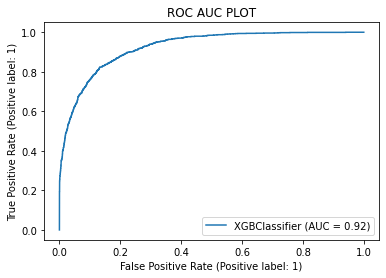

In [103]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test_sc , y_test)
plt.title("ROC AUC PLOT")

### We have got AUC =0.92 and accuracy = 0.8712 which is very good

#### Saving model in pickel format

In [104]:
import joblib
joblib.dump(clf.best_estimator_,"Census_Income_Project.pkl")

['Census_Income_Project.pkl']